In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**droping cols which have more than 70% null values using thresh parameter**

In [4]:
data = data.dropna(thresh=data.shape[0]*0.7,how='all',axis=1)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
#checking the null values in columns.
data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
# imputing the embarked column with most occuring value.
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(),inplace = True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
#next is to handle the outliers.
# outlier detection using standard deviation and Z score
new_data = data
# declaring value for factor to calculate our limit
factor = 3
# calculating the standard deviation and mean for fare column
std = new_data['Fare'].std()
mean = new_data['Fare'].mean()

In [12]:
#calculating upper and lower limit for the fare column
upper_limit = mean+(3*std)
lower_limit = mean-(3*std)
print(upper_limit)
print(lower_limit)

181.2844937601173
-116.87607782296804


In [13]:
new_data = new_data[(new_data['Fare']>=lower_limit) & (new_data['Fare']<=upper_limit)]
# Here we can observe the outliers from old and new data
print(len(data))
print(len(new_data)) 


891
871


In [14]:
# outlier detection and removal using pandas
new_data = data.copy()
#creating the  upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_limit = new_data['Fare'].quantile(0.95)
lower_limit = new_data['Fare'].quantile(0.05)
#check the original data and new_data to identify the outliers.
new_data = new_data[(new_data['Fare']>lower_limit)&(new_data['Fare']<upper_limit)]
print(len(data))
print(len(new_data))

891
791


In [15]:
new_data = data.copy()
upper_limit = new_data['Fare'].quantile(0.95)
lower_limit = new_data['Fare'].quantile(0.05)
# caping the outliers
new_data.loc[(new_data['Fare']>upper_limit),'Fare']= upper_limit
new_data.loc[(new_data['Fare']<lower_limit),'Fare']= lower_limit
print(len(data))
print(len(new_data))

891
891


In [16]:
# performing feature scaling without using the scikit-learn
#normalizing the age and fare column using the formula
new_data = data.copy()
new_data['Age']= (new_data['Age']-new_data['Age'].min())/(new_data['Age'].max()-new_data['Age'].min())
new_data['Fare']=(new_data['Fare']-new_data['Fare'].min())/(new_data['Fare'].max()-new_data['Fare'].min())
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,S


In [17]:
#Standardization using the formula
new_data = data.copy()
new_data['Age']=(new_data['Age']-new_data['Age'].mean())/(new_data['Age'].std())
new_data['Fare'] = (new_data['Fare']-new_data['Fare'].mean())/(new_data['Fare'].std())
new_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565419,1,0,A/5 21171,-0.502163,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663488,1,0,PC 17599,0.786404,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258192,0,0,STON/O2. 3101282,-0.488580,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433068,1,0,113803,0.420494,S
4,5,0,3,"Allen, Mr. William Henry",male,0.433068,0,0,373450,-0.486064,S


In [18]:
#applying bins on age column
new_data = data.copy()
new_data['Age_group']=new_data['Age_group'] = pd.cut(new_data['Age'],bins=[0,18,40,100],labels = ["Children","Adult","Old"])
new_data['Age_group'].value_counts()

Adult       602
Old         150
Children    139
Name: Age_group, dtype: int64

<AxesSubplot:>

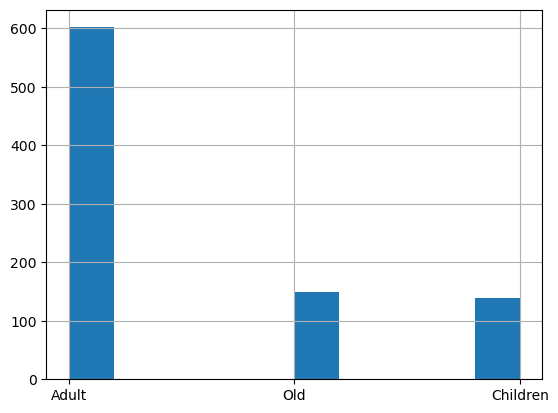

In [19]:
#Checking the age group distribution
new_data['Age_group'].hist()

In [20]:
#Encoding Categorical Variable
# We have two columns with categorical values i,e. Sex and Embarked
# lets check the unique value counts
print(new_data['Sex'].value_counts())
print(new_data['Embarked'].value_counts())


male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [21]:
#implementing integer encoding on sex column
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
new_data['Sex_encode'] = labelencoder.fit_transform(new_data['Sex'])
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1


In [22]:
new_data = pd.get_dummies(new_data,columns=['Embarked'])
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Age_group,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Adult,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Adult,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Adult,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Adult,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Adult,1,0,0,1
